# Laboratorio 2

## Problema 1: Distribución Óptima de Recursos en una Misión Humanitaria

### Problema identificado:
#TODO

### Suposiciones para delimitar el modelo:
- La cantidad de recursos en cada avion debe ser inferior a la capacidad de peso y volumen de este mismo.
- Los recursos pueden ser divididos por kilogramo para ser enviados en diferentes aviones.
- Las medicinas no pueden ser transportadas en el Avion 1
- Los equipos medicos y el agua potable no pueden viajar en el mismo avion.
- A excepción de las medicinas, los equipos medicos y el agua potable, los demas recursos pueden viajar en cualquiera de los aviones.

## Variables Clave
- **Variable de decisión** $x_{i,j}$ = {0, 1} donde la variable toma un valor de 1 en caso que se decida transportar el recurso $i$ en el avion $j$, y un valor de 0 en caso contrario $∀i ∈ R$ y $∀j ∈ A$
- $y_{i,j} \in \mathbb{R}^+$, la cual define cuantos kg de un recurso $i$ se mandan en el avion $j$  $∀i ∈ R$ y $∀j ∈ A$. Se hace una distinción para Equipos médicos, para el cual $y_{R_3,j}$ define cuantos équipos médicos se envían en el avión $j$
## Conjuntos
- $R = R_1, R_2, R_3, R_4, R_5$

  Representando cada uno de los recursos posibles a transportar siguendo la siguiente organización.

| Recurso            | Representación |
|--------------------|--------|
| Alimentos Básicos | $R_1$   |
| Medicinas         | $R_2$   |
| Equipos Médicos   | $R_3$   |
| Agua Potable      | $R_4$   |
| Mantas            | $R_5$   |

- $A = A_1, A_2, A_3, …, A_n$

  Representando cada uno de los aviones.

## Parámetros
- $P_i$ = Peso en kg del recurso $i$, $∀i ∈ R$
- $Vproc_i$ = Volumen en $m^3$ **por kg** del recurso $i$, $∀i ∈ R$
- $Valproc_i$ = Valor en dolares **por kg** del recurso $i$, $∀i ∈ R$
- $CapP_j$ = Capacidad de **peso en kg** del avion $j$, $∀j ∈ A$
- $CapV_j$ = Capacidad de volumen en $m^3$ del avion $j$, $∀j ∈ A$
- $M$ = Constante usada para el modelamiento de la función objetivo

## Relaciones
- Maximizar el valor en recursos que cada avion transporte
$$
max(\sum_{i ∈ R} \sum_{j ∈ A} Valproc_i *x_{i,j}*y_{i,j})
$$

- Condicionar el valor de $y_{i,j}$ a la variable binaria $x_{i,j}$
$$
x_{i,j} \le M*y_{i,j}, \forall i,j \in R,A
$$

- Limitar los équipos médicos a que solo puedan ser enviados en unidades de 300kg
$$
y_{R_3,j}mod_{300} = 0, \forall j \in A 
$$
- Limitar los recursos de un avion para que no superen la capacidad maxima de peso

$$
\sum_{i ∈ R} y_{i,j}≤ CapP_j, ∀j ∈ A
$$

- Limitar los recursos de un avion para que no superen la capacidad maxima de volumen

$$
\sum_{i ∈ R} V_i*y_{i,j} ≤ CapV_j, ∀j ∈ A
$$

- Modelar las restricciones especificas

  Los medicamentos no pueden viajar en el avion 1

  $$x_{R_2,1} = 0$$

  Equipos medicos y agua potable no pueden viajar juntos
  $$
  x_{R_3,j} + x_{R_4,j} \le 1, \forall j\in A
  $$

---

## Problema 2: Redes de Transporte

### Problema a Resolver

Se busca minimizar los costos de transporte, de tal manera que los envios desde Bogotá y Medellín logren suplir la demanda de productos en las demás ciudades

### Suposiciones

- Todas las ciudades podrán recibir productos tanto de Bogotá como de Medellín
- Bogotá y Medellín podran suplir productos a todas las ciudades menos a las que estan restringidas para cada ciudad. Bogotá no puede enviar a Cali y Medellin no puede enviar a Barranquilla
- Se debe suplir el 100% de la demanda en las ciudades destino

### Variables

- $y_{i,j} \in \mathbb{R}^+_0$ donde se define la cantidad de toneladas enviadas de la ciudad de origen $i$ a la ciudad destino $j,\forall i \in O$ y $\forall j \in D$

### Conjuntos

- $O = O_1, O_2, \dots, O_n$\
    Representando todas las ciudades origen que tienen la capacidad de distribuir productos

| Ciudad Origen | Etiqueta |
|---------------|----------|
| Bogotá        | O_1      |
| Medellín      | O_2      |

- $D = D_1, D_2, D_3, D_4, D_5, D_6 \dots, D_n$

| Ciudad Destino | Etiqueta |
|----------------|----------|
| Cali           | D_1      |
| Barranquilla   | D_2      |
| Pasto          | D_3      |
| Tunja          | D_4      |
| Chía           | D_5      |
| Manizales      | D_6      |

### Parámetros

- $Oferta_i =$ Oferta en *toneladas* de productos de la ciudad de origen $i, \forall i \in O$
- $Demanda_j =$ Demanda en *toneladas* de productos de la ciudad de destino $j, \forall j \in D$
- $CTran_{i, j} =$ Costo de transporte por tonelada **(USD/ton)** de la ciudad de origen $i$ a la ciudad destino $j, \forall i,j \in O, D$

### Relaciones

#### Función Objetivo
$$
min(\sum_{i \in O}\sum_{j \in D}CTran_{i, j} * y_{i, j})
$$

#### Restricciones

- La suma de productos enviados no puede superar el total de la oferta de la ciudad de origen $i$
$$
\sum_{j \in D}y_{i,j} \le Oferta_i, \forall i \in O
$$

- La demanda de cada una de las ciudades destino debe ser suplida por completo
$$
\sum_{i \in O}y_{i,j} = Demanda_j, \forall j \in D
$$

### Tipo de Problema

Este seria un problema lineal, deterministico, continuo y estático

In [ ]:
import pyomo.environ as pyo

model = pyo.ConcreteModel()

---

## Problema 3: Cubrimiento del Tablero con Damas

In [ ]:

import time
from pyomo.environ import (
    Binary,
    ConcreteModel,
    ConstraintList,
    Objective,
    RangeSet,
    Var,
)
from pyomo.opt import SolverFactory
from queen_mapper import visualize_queens


class QueenCoverSolver:
    """
    Class to solve the minimum queen cover problem using Pyomo.

    Given a chessboard of a specified size (default 8 x 8), the goal is to place
    the minimum number of queens such that every square is attacked by at least one queen.
    """

    def __init__(self, board_size=8):
        """
        Initialize the solver with a given board size.

        Args:
            board_size (int): Size of the chessboard (default is 8).
        """
        self.board_size = board_size
        self.coverage_matrix = {}
        self.model = None

    def generate_coverage_matrix(self):
        """
        Calculates which squares each queen can attack on a chessboard.

        Returns:
            dict: A dictionary representing the coverage matrix. Keys are (square1, square2)
                  tuples, and values are 1 if a queen placed on square2 can attack square1, 0 otherwise.
        """
        coverage_matrix = {}
        queens = self.que
        self.coverage_matrix = coverage_matrix
        return coverage_matrix

    def create_pyomo_model(self, coverage_matrix):
        """
        Creates the Pyomo self.self.model for the queen placement problem.

        Args:
            coverage_matrix (dict): The coverage matrix computed for the chessboard.

        Returns:
            ConcreteModel: A Pyomo ConcreteModel representing the problem.
        """
        model = ConcreteModel()

        # TODO: Implement the Pyomo model for the queen placement problem.
        # Define the set of squares on the board.
        # Hint: Remeber not because the board is essentially a 2D grid means that your set size should behave like a 2D grid.

        # Define binary decision variables.

        # Define the objective function: minimize the total number of queens placed.

        # Define constraints

        self.model = model
        return model

    def solve_and_visualize(self):
        """
        Solves the Pyomo model and visualizes the queen placements.

        This method should:
         - Solve the model using a specified solver (e.g., 'glpk').
         - Print the objective function value.
         - Extract the solution and visualize the queen placements using the
           'visualize_queens' function.
        """
        if self.model is None:
            raise ValueError("The model has not been created. Run create_pyomo_model() first.")

        solver = SolverFactory("glpk")
        results = solver.solve(self.model, tee=True)

        print("Objective function value: ", self.model.obj())
        print("Results:", results)

        queens = []
        for i in self.model.squares:
            if self.model.x[i]() == 1:
                pos = (i - 1) % 8, (i - 1) // 8  # Convert to chess notation
                queens.append(chr(pos[0] + 97) + str(pos[1] + 1))

        visualize_queens(queens)

## Problema 4: Ruta de Mínimo Costo en una Red de Nodos Móviles Inalámbricos

#### Paso 1: Preprocesamiento y Parametrización:

In [ ]:
import math


def calcular_distancia(xi,xj,yi,yj)->float:
    return math.sqrt((xi-xj)**2+(yi-yj)**2)

'''
Se asume que como parametro inicial se recibe la tabla de posiciones de cada nodo
en la estructura de diccionario de la forma 
{
  llave_nodo_i:(x_i,y_i)
}
'''
tabla_posiciones = {
    1:(20,6),
    2:(22,1),
    3:(9,2),
    4:(3,25),
    5:(21,10),
    6:(29,2),
    7:(14,12)
}

def generar_matriz_costos(tabla_posiciones)->list:
    matriz_costos =[]
    for i in tabla_posiciones.keys():
        xi = tabla_posiciones[i][0]
        yi = tabla_posiciones[i][1]
        costos_i = []
        for j in tabla_posiciones.keys():
            xj = tabla_posiciones[j][0]
            yj = tabla_posiciones[j][1]
            costo = round(calcular_distancia(xi,xj,yi,yj),4)
            if costo<=20:
                costos_i.append(costo)
            else:
                costos_i.append(9999999)
        matriz_costos.append(costos_i)
    return matriz_costos


### Problema identificado:
#TODO

### Suposiciones para delimitar el modelo:
- Cada eje (dado que exista cumpliendo la restricción de las 20 unidades) es no dirigido.
- El nodo de origen es el 4 ( posición 3 en la matriz de costos dada la indexación de listas en python)
- El nodo destino es el 6 (posición 5 en la matriz de costos)

## Conjunto:
$N = N_1, N_2, N_3, ..., N_n$
Representando cada uno de los nodos existentes en el grafo

## Parámetros 
- $X_i$ = Coordenada X en el plano del nodo $i$, $∀i ∈ N$
- $Y_i$ = Coordenada Y en el plano del nodo $i$, $∀i ∈ N$
- $C_{i,j}$ = Costo de cruzar el eje entre los nodos $i$ y $j$, $\forall i,j \in N $
- $ n_{or} $ = nodo origen, $ n_{or} \in N$
- $ n_{dest} $ = nodo origen $ n_{dest} \in N $
## Variables Clave
- **Variable de decisión** $x_{i,j}$ = {0, 1} donde la variable toma un valor de 1 en caso que se decida tomar el eje que une los nodos $i$ y $j$, y un valor de 0 en caso contrario $∀i,j ∈ N$

## Función Objetivo:
- Minimizar el costo de la suma de los caminos 
$$
min(\sum_{(i,j) ∈ N} C_{i,j} *x_{i,j})
$$

## Restricciones:
- Del nodo origen tiene que seleccionarse 1 camino hacia algún otro nodo (para asegurarse que el camino comienza)

$$
\sum_{j ∈ N} x_{n_{or},j} =1
$$

- Tiene que seleccionarse 1 camino que termine en el nodo destino (para asegurarse que el camino se completó)

$$
\sum_{i ∈ N} x_{i,n_{dest}} =1
$$

- Si se selecciona un camino $(i,j)$, tiene que seleccionarse algún camino $(j,s)$, para todos los $i,j,s \in N$
$$
\sum_{i ∈ N } x_{i,j} == \sum_{s ∈ N } x_{j,s}, \forall j \in N |(j\neq n_{dest} \wedge j\neq n_{or})
$$



In [14]:
from tabulate import tabulate

matriz_costos = generar_matriz_costos(tabla_posiciones)
headers = [f"Nodo {i}" for i in tabla_posiciones.keys()]

print(tabulate(matriz_costos, headers=headers, showindex=headers))


          Nodo 1    Nodo 2    Nodo 3    Nodo 4    Nodo 5    Nodo 6    Nodo 7
------  --------  --------  --------  --------  --------  --------  --------
Nodo 1    0         5.3852   11.7047    1e+07     4.1231    9.8489    8.4853
Nodo 2    5.3852    0        13.0384    1e+07     9.0554    7.0711   13.6015
Nodo 3   11.7047   13.0384    0         1e+07    14.4222   20        11.1803
Nodo 4    1e+07     1e+07     1e+07     0         1e+07     1e+07    17.0294
Nodo 5    4.1231    9.0554   14.4222    1e+07     0        11.3137    7.2801
Nodo 6    9.8489    7.0711   20         1e+07    11.3137    0        18.0278
Nodo 7    8.4853   13.6015   11.1803   17.0294    7.2801   18.0278    0


In [12]:
from pyomo.environ import *

modelo4 = ConcreteModel()
N_NODOS = 7

NODO_ORIGEN = 4

NODO_DEST = 6
modelo4.N = RangeSet(N_NODOS)
modelo4.x = Var(modelo4.N, modelo4.N, domain=Binary,initialize=0)
tabla_costos = generar_matriz_costos(tabla_posiciones)
modelo4.obj = Objective(expr=sum(tabla_costos[i-1][j-1] * modelo4.x[i,j] for i in modelo4.N for j in modelo4.N), sense=minimize)

modelo4.restricciones = ConstraintList()

modelo4.restricciones.add(sum(modelo4.x[NODO_ORIGEN, j] for j in modelo4.N if j != NODO_ORIGEN) == 1)
modelo4.restricciones.add(sum(modelo4.x[i, NODO_DEST] for i in modelo4.N if i != NODO_DEST) == 1)


for j in modelo4.N:
    if j != NODO_ORIGEN and j != NODO_DEST:
        modelo4.restricciones.add(
            sum(modelo4.x[i, j] for i in modelo4.N) == sum(modelo4.x[j, s] for s in modelo4.N)
        )

solver = SolverFactory('glpk')  
results = solver.solve(modelo4)

if results.solver.status == SolverStatus.ok and results.solver.termination_condition == TerminationCondition.optimal:
    print("Camino óptimo:")
    print("Costo total (redondeado):", round(modelo4.obj(),3))
    print("Ejes recorridos:")
    for i in modelo4.N:
        for j in modelo4.N:
            if modelo4.x[i, j].value == 1:
                print(f"Nodo {i} al nodo {j} (Costo: {tabla_costos[i-1][j-1]})")
else:
    print("ay")



Camino óptimo:
Costo total (redondeado): 35.057
Ejes recorridos:
Nodo 4 al nodo 7 (Costo: 17.0294)
Nodo 7 al nodo 6 (Costo: 18.0278)


## Problema 5: Rutas Óptimas para Equipos de Inspección de infraestructura en Colombia

### 1. Preprocesamiento de Datos

In [1]:
import numpy as np
import csv

def read_cost_matrix_csv(filename):
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        # Read the first row to get the node IDs.
        node_ids = next(reader)
        # Read the remaining rows as data.
        data = list(reader)
    
    # Convert the data to a numpy array.
    cost_matrix = np.array(data, dtype=int)
    
    return cost_matrix


### 2. Formulación de TSP para un Único Viajero

#### Variables

- $x_{i,j} \in {0, 1}$ variable de decisión para determinar si se elije el camino desde el nodo $i$ al nodo $j$
- $u_i$ variable auxiliar para la eliminación de subtures en el recorrido de los nodos

#### Conjuntos

Conjunto de Ciudades:
- $C = C_1, C_2,\dots, C_n$

#### Parámetros

- $c_{i,j}$ costo de ir de la ciudad $i$ a la ciudad $j$, $\forall i,j \in C$
- $Ciud$ conjunto de ciudades

#### Función Objetivo

- Minimizar el costo total del viaje, recorriendo en un ciclo la totalidad de ciudades
$$
min(\sum_{i \in C}\sum_{j \in C} c_{i,j} * x_{i,j})
$$

#### Restricciones

- Cada ciudad $i$ tiene exactamente un arco de entrada y un arco de salida
$$
\sum_{j \in C, j \neq i} x_{i,j} = 1, \forall i \in C
$$
$$
\sum_{i \in C, i \neq j} x_{i,j} = 1, \forall j \in C
$$

- Eliminación de los subtures
$$
u_i - u_j + n*x_{i,j} \leq n - 1, \forall i \neq j, i,j \in {1,\dots, n-1 } 
$$

In [66]:
import pyomo.environ as pyo
import networkx as nx
import matplotlib.pyplot as plt

class Optimization:
    """
    A basic TSP model for a single driver (one route) without subtour elimination.
    It uses a cost matrix to define travel costs between cities and ensures that
    each city is visited exactly once (inbound=1, outbound=1) but does NOT include
    additional constraints to prevent subtours.

    Attributes:
        cost_matrix (list of lists): 2D matrix of travel costs between cities.
        num_cities (int): Number of cities (inferred from cost_matrix).
        model (pyo.ConcreteModel): The Pyomo model built in `model()`.

    Methods:
        model(): Builds the Pyomo model with variables, objective, and constraints.
        print_model(): Prints the Pyomo model structure.
        solve_model(): Solves the model using the 'appsi_highs' solver (by default).
        print_output(): Prints/plots the resulting route(s) as a directed graph.
    """

    def __init__(self, cost_matrix):
        self.cost_matrix = cost_matrix
        self.num_cities = len(cost_matrix)  # infer number of cities from matrix size

    def model(self):
        # Create ConcreteModel
        self.model = pyo.ConcreteModel()

        # Set of cities
        self.model.N = pyo.RangeSet(0, self.num_cities-1)

        # Decision variables x[i, j] = 1 if we travel from city i to city j
        self.model.x = pyo.Var(self.model.N, self.model.N, within=pyo.Binary)

        # # Auxiliary variable u[i] to enforce subtour elimination
        self.model.u = pyo.Var(self.model.N, within=pyo.NonNegativeIntegers, bounds=(0, self.num_cities - 1))

        # Cost parameter from cost_matrix
        def cost_init(model, i, j):
            return self.cost_matrix[i - 1][j - 1]
        self.model.c = pyo.Param(self.model.N, self.model.N, initialize=cost_init)

        # Objective function: minimize total travel cost
        def _objective_function(model):
            return sum(model.x[i, j] * model.c[i, j]
                       for i in model.N for j in model.N)
        self.model.objective = pyo.Objective(rule=_objective_function,
                                             sense=pyo.minimize)

        # Constraint: each city has exactly one outbound arc
        def _outbound_rule(model, i):
            return sum(model.x[i, j] for j in model.N if j != i) == 1
        self.model.outbound = pyo.Constraint(self.model.N, rule=_outbound_rule)

        # Constraint: each city has exactly one inbound arc
        def _inbound_rule(model, j):
            return sum(model.x[i, j] for i in model.N if i != j) == 1
        self.model.inbound = pyo.Constraint(self.model.N, rule=_inbound_rule)

        # No self-loops: x[i, i] = 0
        def _no_self_loops(model, i):
            return model.x[i, i] == 0
        self.model.no_self_loops = pyo.Constraint(self.model.N, rule=_no_self_loops)

        # Subtour elimination constraints
        def _subtour_elimination(model, i, j):
            if i != j and i != 1 and j != 1:
                return model.u[i] - model.u[j] + self.num_cities * model.x[i, j] <= self.num_cities - 1
            else:
                return pyo.Constraint.Skip

        self.model.subtour_elimination = pyo.Constraint(self.model.N, self.model.N, rule=_subtour_elimination)
        

    def print_model(self):
        """Prints the model structure."""
        self.model.pprint()

    def solve_model(self):
        """Solves the TSP model using the 'glpk' solver."""
        solver = pyo.SolverFactory('glpk')
        result = solver.solve(self.model, tee=True)
        print(result)

    def print_output(self):
        """
        Plots the solution as a directed graph using NetworkX and matplotlib.
        Since there's only one route (single driver), all edges are colored the same.
        """
        total_cost = 0
        valid_edges = []
        for i in self.model.N:
            for j in self.model.N:
                if pyo.value(self.model.x[i, j]) > 0.5:
                    total_cost += self.cost_matrix[i - 1][j - 1]
                    valid_edges.append((i, j))

        # Build a directed graph
        G = nx.DiGraph()
        G.add_nodes_from(self.model.N)

        # Add edges from the solution
        for (i, j) in valid_edges:
            G.add_edge(i, j)

        pos = nx.spring_layout(G)
        nx.draw_networkx(G, pos, with_labels=True,
                         node_color='lightblue',
                         edge_color='red',
                         arrows=True)
        plt.axis("off")
        plt.show()
        print("Costo total del recorrido:", total_cost)
        print("Ruta óptima:", valid_edges)


In [67]:
cost_matrix = read_cost_matrix_csv("cost_matrix_5_nodes_2.5_spread.csv")

opt = Optimization(cost_matrix)
opt.model()
opt.solve_model()

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\Ignacio\AppData\Local\Temp\tmpshn4vrrn.glpk.raw --wglp C:\Users\Ignacio\AppData\Local\Temp\tmp25h9k6xx.glpk.glp
 --cpxlp C:\Users\Ignacio\AppData\Local\Temp\tmp4xn342tl.pyomo.lp
Reading problem data from 'C:\Users\Ignacio\AppData\Local\Temp\tmp4xn342tl.pyomo.lp'...
C:\Users\Ignacio\AppData\Local\Temp\tmp4xn342tl.pyomo.lp:226: warning: lower bound of variable 'x33' redefined
C:\Users\Ignacio\AppData\Local\Temp\tmp4xn342tl.pyomo.lp:226: warning: upper bound of variable 'x33' redefined
27 rows, 29 columns, 81 non-zeros
29 integer variables, 25 of which are binary
251 lines were read
Writing problem data to 'C:\Users\Ignacio\AppData\Local\Temp\tmp25h9k6xx.glpk.glp'...
186 lines were written
GLPK Integer Optimizer 5.0
27 rows, 29 columns, 81 non-zeros
29 integer variables, 25 of which are binary
Preprocessing...
22 rows, 24 columns, 76 non-zeros
24 integer variables, 20 of which are binary
Scaling..

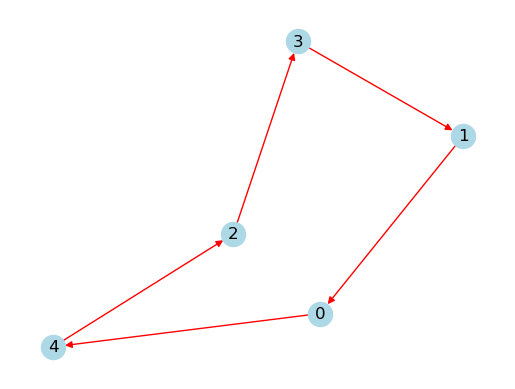

Costo total del recorrido: 16
Ruta óptima: [(0, 4), (1, 0), (2, 3), (3, 1), (4, 2)]


In [68]:
opt.print_output()

#### ¿Qué evidencia presenta el resultado obtenido?

Se puede evidenciar que el modelo presenta un unico circuito, con inicio y fin en el nodo 0, con un costo minimo total de 16. Este resultado es positivo ya que no presenta subtours, genera un circuito con inicio y fin en el nodo 0 y minimiza el costo del camino total

#### ¿Es correcto el resultado de la implementación?

El resultado de la implementación si es correcto, ya que el camino que pase por todos los nodos, iniciando en 0 y volviendo a este mismo nodo, tiene un costo total de 16. Hay varios caminos que pueden cumplir esta condicion, y el modelo utilizado logra proponer una solución correcta cumpliendo con todas las restricciones.

### 3. Extensión a Múltiples Equipos

Para el planteamiento de este problema, se va a agregar el indice $k$, el cual estará relacionado con el salesmen que decida tomar el camino $i, j$

#### Suposiciones

- Un equipo puede visitar cualquier ciudad. Tiene que minimo visitar una ciudad.
- Todos los equipos deben visitar al menos una ciudad. Todos deben "salir" de 0
- No pueden haber más equipos que n-1 ciudades ya que entra en conflicto con las siguentes restricciones; cada ciudad puede ser visitada una sola vez, todos los equipos deben visitar minimo una ciudad

#### Variables

- $x_{i,j,k} \in {0,1}$ variable de decisión en donde se determina si el salesmen $k$ decide o no tomar el camino entre la ciudad $i$ a la ciudad $j$

- $u_{i,k}$ variable auxiliar para la eliminación de subtoures para cada salesmen $k$

#### Conjuntos

Conjunto de nodos (ciudades) empezando por el nodo 0
- $N = N_0,\dots,N_n$ 

Conjunto de equipos de venta (Salesmen)
- $K = K_0,\dots,K_n$

#### Parámetros
- $c_{i,j}$ costo de viaje entre la ciudad $i$ a la ciudad $j$
- $NumSalesmen$ cantidad de equipos que van a recorrer la infraestructura

#### Función Objetivo

Minimizar el costo del viaje total, tal que se recorran todos los nodos partiendo desde el nodo 0
$$
min(\sum_{i \in N}\sum_{j \in N}\sum_{k \in K} c_{i,j}*x_{i,j,k})
$$

#### Restriciones

- Cada ciudad $i$ tiene exactamente un arco de entrada y un arco de salida entre todos los equipos excepto la ciudad 0
$$
\sum_{j \in C, j \neq i} x_{i,j,k} = 1, \forall i \in N | 0, \forall k \in K
$$
$$
\sum_{i \in C, i \neq j} x_{i,j,k} = 1, \forall j \in N | 0, \forall k \in K
$$

- Cada equipo tiene que salir de 0 y regresar a 0
$$
\sum_{j \in N | 0} x_{0,j,k} = 1, \forall k \in K
$$
$$
\sum_{i \in N | 0} x_{i,0,k} = 1, \forall k \in K
$$

- Para cada viajero $k$ y para cada ciudad $i \neq 0$, el numero de arcos que entran a $i$ es igual al numero de arcos que salen
$$
\sum_{j \in N | j \neq i} x_{i,j,k} = \sum_{h \in N | h \neq i} x_{h,i,j}, \forall i \in N | 0, \forall k \in K
$$

- Eliminación de los subtures
$$
u_{i,k} - u_{j,k} + n*x_{i,j,k} \leq n - 1, \forall i \neq j, i,j \in N | 0, \forall k \in K
$$

In [2]:
import pyomo.environ as pyo
import networkx as nx
import matplotlib.pyplot as plt

class Optimization:
    """
    A basic TSP model for a single driver (one route) without subtour elimination.
    It uses a cost matrix to define travel costs between cities and ensures that
    each city is visited exactly once (inbound=1, outbound=1) but does NOT include
    additional constraints to prevent subtours.

    Attributes:
        cost_matrix (list of lists): 2D matrix of travel costs between cities.
        num_cities (int): Number of cities (inferred from cost_matrix).
        model (pyo.ConcreteModel): The Pyomo model built in `model()`.

    Methods:
        model(): Builds the Pyomo model with variables, objective, and constraints.
        print_model(): Prints the Pyomo model structure.
        solve_model(): Solves the model using the 'appsi_highs' solver (by default).
        print_output(): Prints/plots the resulting route(s) as a directed graph.
    """

    def __init__(self, cost_matrix, num_salesmen):
        self.cost_matrix = cost_matrix
        self.num_cities = len(cost_matrix)  # infer number of cities from matrix size
        self.num_salesmen = num_salesmen

    def model(self):
        # Create ConcreteModel
        self.model = pyo.ConcreteModel()

        # Set of cities
        self.model.N = pyo.RangeSet(0, self.num_cities-1)
        
        # Set of Salesmen
        self.model.K = pyo.RangeSet(0, self.num_salesmen-1)

        # Decision variables x[i, j, k] = 1 if we travel from city i to city j with salesmen k
        self.model.x = pyo.Var(self.model.N, self.model.N, self.model.K, within=pyo.Binary)

        # Auxiliary variable u[i,k] to enforce subtour elimination
        self.model.u = pyo.Var(self.model.N, self.model.K, within=pyo.NonNegativeIntegers, bounds=(0, self.num_cities - 1))

        # Cost parameter from cost_matrix
        def cost_init(model, i, j):
            return self.cost_matrix[i][j]
        self.model.c = pyo.Param(self.model.N, self.model.N, initialize=cost_init)

        # Objective function: minimize total travel cost
        def _objective_function(model):
            return sum(model.x[i, j, k] * model.c[i, j]
                       for i in model.N for j in model.N for k in model.K)
        self.model.objective = pyo.Objective(rule=_objective_function,
                                             sense=pyo.minimize)

        # Constraint: each city has exactly one outbound arc
        def _outbound_rule(model, i):
            if i == 0:
                return pyo.Constraint.Skip
            else:
                return sum(model.x[i, j, k] for k in model.K for j in model.N if j != i) == 1
        self.model.outbound = pyo.Constraint(self.model.N, rule=_outbound_rule)

        # Constraint: each city has exactly one inbound arc
        def _inbound_rule(model, j):
            if j == 0:
                return pyo.Constraint.Skip
            else:
                return sum(model.x[i, j, k] for k in model.K for i in model.N if i != j) == 1
        self.model.inbound = pyo.Constraint(self.model.N, rule=_inbound_rule)

        # No self-loops: x[i, i] = 0
        def _no_self_loops(model, i):
            return sum(model.x[i, i, k] for k in model.K) == 0
        self.model.no_self_loops = pyo.Constraint(self.model.N, rule=_no_self_loops)
        
        # Cada equipo debe salir de 0
        def _departure_rule(model, k):
            return sum(self.model.x[0, j, k] for j in self.model.N if j != 0) == 1
        self.model.departure = pyo.Constraint(self.model.K, rule=_departure_rule)
        
        # Cada equipo debe regresar a 0
        def _return_rule(model, k):
            return sum(self.model.x[i, 0, k] for i in self.model.N if i != 0) == 1
        self.model.return_rule = pyo.Constraint(self.model.K, rule=_return_rule)
        
        # El flujo de entrada de cada ciudad debe ser igual al flujo de salida
        def flow_balance(model, i, k):
            if i == 0:
                return pyo.Constraint.Skip
            return (sum(self.model.x[i, j, k] for j in self.model.N if j != i)
                    == sum(self.model.x[h, i, k] for h in self.model.N if h != i))
        self.model.flow_balance = pyo.Constraint(self.model.N, self.model.K, rule=flow_balance)
        
        # Subtour elimination constraints
        def _subtour_elimination(model, i, j, k):
            if i != j and i != 0 and j != 0:
                return self.model.u[i, k] - self.model.u[j, k] + self.num_cities * self.model.x[i, j, k] <= self.num_cities - 1
            else:
                return pyo.Constraint.Skip

        self.model.subtour_elimination = pyo.Constraint(self.model.N, self.model.N, self.model.K, rule=_subtour_elimination)
        

    def print_model(self):
        """Prints the model structure."""
        self.model.pprint()

    def solve_model(self):
        """Solves the TSP model using the 'glpk' solver."""
        solver = pyo.SolverFactory('glpk')
        result = solver.solve(self.model, tee=True)
        print(result)

    def print_output(self):
        # Extracción de arcos seleccionados
        total_cost = 0
        edges_by_salesman = {k: [] for k in self.model.K}
        for k in self.model.K:
            for i in self.model.N:
                for j in self.model.N:
                    if i != j and pyo.value(self.model.x[i, j, k]) > 0.5:
                        total_cost += self.cost_matrix[i][j]
                        edges_by_salesman[k].append((i, j))

        print("Costo total del recorrido:", total_cost)
        # Mostrar rutas por viajero
        for k in self.model.K:
            print(f"\nViajero {k}:")
            print("Arcos =", edges_by_salesman[k])

        # Visualización (opcional, coloreando rutas por viajero)
        G = nx.DiGraph()
        G.add_nodes_from(self.model.N)
        colors = ['red', 'blue', 'green', 'orange', 'purple', 'black']  # etc.
        color_map = []
        for k in self.model.K:
            for (i, j) in edges_by_salesman[k]:
                G.add_edge(i, j, color=colors[k % len(colors)])

        # Extraer colores para cada arista
        edges = G.edges()
        edge_colors = [G[u][v]['color'] for u, v in edges]
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, edge_color=edge_colors,
                node_color='lightblue', arrows=True)
        plt.show()

In [ ]:
cost_matrix = read_cost_matrix_csv("cost_matrix_10_nodes_1.5_spread.csv")
print(cost_matrix)
opt = Optimization(cost_matrix, 5)
opt.model()
opt.solve_model()

[[0 3 1 3 2 2 5 3 1 2]
 [3 0 4 2 3 3 5 1 2 3]
 [1 4 0 3 2 2 5 3 2 2]
 [3 2 3 0 1 2 3 3 2 2]
 [2 3 2 1 0 1 3 3 2 1]
 [2 3 2 2 1 0 3 4 2 0]
 [5 5 5 3 3 3 0 6 5 4]
 [3 1 3 3 3 4 6 0 1 4]
 [1 2 2 2 2 2 5 1 0 2]
 [2 3 2 2 1 0 4 4 2 0]]
GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\Ignacio\AppData\Local\Temp\tmp2wrcmjzq.glpk.raw --wglp C:\Users\Ignacio\AppData\Local\Temp\tmphec0127z.glpk.glp
 --cpxlp C:\Users\Ignacio\AppData\Local\Temp\tmpc6blt72z.pyomo.lp
Reading problem data from 'C:\Users\Ignacio\AppData\Local\Temp\tmpc6blt72z.pyomo.lp'...
C:\Users\Ignacio\AppData\Local\Temp\tmpc6blt72z.pyomo.lp:5210: warning: lower bound of variable 'x471' redefined
C:\Users\Ignacio\AppData\Local\Temp\tmpc6blt72z.pyomo.lp:5210: warning: upper bound of variable 'x471' redefined
443 rows, 545 columns, 2840 non-zeros
545 integer variables, 500 of which are binary
5710 lines were read
Writing problem data to 'C:\Users\Ignacio\AppData\Local\Temp\tmphec0127z.glpk.

Costo total del recorrido: 26

Viajero 0:
Arcos = [(0, 2), (2, 0)]

Viajero 1:
Arcos = [(0, 4), (4, 0)]

Viajero 2:
Arcos = [(0, 5), (5, 9), (9, 0)]

Viajero 3:
Arcos = [(0, 6), (1, 7), (3, 1), (6, 3), (7, 0)]

Viajero 4:
Arcos = [(0, 8), (8, 0)]


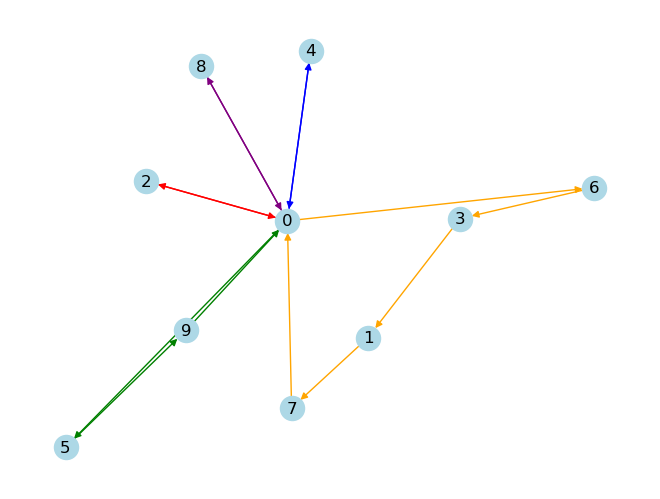

In [18]:
opt.print_output()

### 4. Evaluación y Análisis

- El modelo se probó con 1, 3 y 4 equipos para 5, 10 y 15 nodos. En todas las configuraciones funcionó excepto con 3 y 4 equipos para 15 nodos. En estas ultimas 2 configuraciones se demoró más de 10 minutos en solucionar el problema.

- Para las configuraciones que se lograron probar, siempre la configuración con menor costo era con solo 1 equipo. Esto, para configuraciones pequeñas (5, 10 y 15 nodos), tiene sentido ya que en este problema cada viajero adicional debe partir y regresar al punto 0, esto le suma un costo de ida y regreso al costo total por cada viajero. Este costo extra, en una configuración pequeña, termina sobrepasando la aparente optimización de subdividir el camino entre varios equipos. Sin embargo, para configuraciones más grandes, seguramente será más optimo pagar este "costo extra" por cada nuevo equipo que realizar todo el trayecto con un solo equipo.